In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import plotly.graph_objects as go
from scipy.stats import linregress
import warnings
from IPython.display import display, HTML

In [2]:
btc_day = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_day.csv")
btc_day.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


In [3]:
day_5 = btc_day.head()
day_5

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


In [5]:
selection = ['Date','Symbol','Open','High','Low','Close','Volume BTC', 'Volume USD']

df = day_5[selection]

df.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#000000'), 
            ('color', '#00C2CB'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#00C2CB'),
            ('color', '#000000')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', '#000000')]},
 
]
).hide_index()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_36188\2463770582.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ).hide_index()


Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
2020-04-10,BTCUSD,7315.250000,7315.250000,7315.250000,7315.250000,0.000000,0.000000
2020-04-09,BTCUSD,7369.600000,7378.850000,7115.040000,7315.250000,2237.130000,16310014.530000
2020-04-08,BTCUSD,7201.810000,7432.230000,7152.800000,7369.600000,2483.600000,18138080.270000
2020-04-07,BTCUSD,7336.960000,7468.420000,7078.000000,7201.810000,2333.340000,17047120.320000
2020-04-06,BTCUSD,6775.210000,7369.760000,6771.010000,7336.960000,3727.470000,26533750.170000


In [4]:
btc_min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv")
btc_min.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [6]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80


In [7]:
btc_day_copy.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1.643000e+03
mean,4820.497450,4968.447219,4652.938223,4824.616348,3798.582824,2.134309e+07
std,3941.711821,4082.800511,3763.911850,3940.478912,4438.148072,3.697969e+07
min,242.500000,245.000000,236.000000,243.950000,12.170000,2.984440e+03
25%,741.560000,750.835000,731.065000,741.975000,1038.615000,1.683460e+06
50%,4141.590000,4261.600000,3985.000000,4145.110000,2265.020000,9.402772e+06
75%,7923.495000,8151.690000,7638.110000,7923.495000,4926.745000,2.476804e+07
max,19499.990000,19999.000000,18870.000000,19499.990000,49229.150000,5.606539e+08


In [9]:
btc_min_copy = btc_min.copy()
btc_min_copy.drop(btc_min_copy[btc_min_copy['Volume'] == 0].index, inplace = True)
btc_min_copy.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [11]:

btc_min_copy.drop(btc_min_copy[btc_min_copy['Open'] == 0].index, inplace = True)
btc_min_copy.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [12]:
btc_min_copy.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,1.365701e+06,1.365701e+06,1.365701e+06,1.365701e+06,1.365701e+06,1.365701e+06
mean,6.781958e+11,6.288796e+03,6.292363e+03,6.285329e+03,6.288803e+03,4.403080e+00
std,7.735007e+11,3.684213e+03,3.687416e+03,3.680981e+03,3.684210e+03,2.729042e+01
min,1.444312e+09,2.360000e+02,2.429500e+02,2.360000e+02,2.360000e+02,2.000000e-10
25%,1.504198e+09,3.525000e+03,3.526030e+03,3.523870e+03,3.525000e+03,5.593758e-02
50%,1.527087e+09,6.534010e+03,6.536020e+03,6.531470e+03,6.534010e+03,5.013417e-01
75%,1.559046e+12,8.677910e+03,8.682770e+03,8.673300e+03,8.677910e+03,3.163749e+00
max,1.586390e+12,1.999900e+04,1.999900e+04,1.999070e+04,1.999900e+04,8.264463e+03


btc_hr = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv")
btc_hr.head()

In [6]:
min_5 = btc_min.head()

In [7]:
selection = ['Unix Timestamp', 'Date','Symbol','Open','High','Low','Close','Volume']

df = min_5[selection]

df.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#000000'), 
            ('color', '#00C2CB'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#00C2CB'),
            ('color', '#000000')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', '#000000')]},
 
]
).hide_index()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\3523495446.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ).hide_index()


Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
1586390400000,2020-04-09 00:00:00,BTCUSD,7369.600000,7369.600000,7348.470000,7350.410000,7.733528
1586390340000,2020-04-08 23:59:00,BTCUSD,7364.370000,7369.600000,7364.370000,7369.600000,1.310954
1586390280000,2020-04-08 23:58:00,BTCUSD,7360.890000,7367.180000,7360.890000,7364.370000,1.018774
1586390220000,2020-04-08 23:57:00,BTCUSD,7357.620000,7366.120000,7357.620000,7360.890000,0.026251
1586390160000,2020-04-08 23:56:00,BTCUSD,7370.710000,7370.710000,7357.620000,7357.620000,0.444867


In [8]:
btc_hr = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv")
btc_hr.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811


In [9]:
hr_5 = btc_hr.head()

In [10]:
selection = ['Unix Timestamp', 'Date','Symbol','Open','High','Low','Close','Volume']

df = hr_5[selection]

df.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#000000'), 
            ('color', '#00C2CB'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#00C2CB'),
            ('color', '#000000')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', '#000000')]},
 
]
).hide_index()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\83411480.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ).hide_index()


Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
1586390400000,2020-04-09 00:00:00,BTCUSD,7369.600000,7369.600000,7338.230000,7338.230000,7.788915
1586386800000,2020-04-08 23:00:00,BTCUSD,7367.280000,7398.920000,7348.470000,7369.600000,66.558293
1586383200000,2020-04-08 22:00:00,BTCUSD,7337.190000,7390.250000,7322.870000,7367.280000,88.486108
1586379600000,2020-04-08 21:00:00,BTCUSD,7327.700000,7370.000000,7311.330000,7337.190000,35.551553
1586376000000,2020-04-08 20:00:00,BTCUSD,7320.110000,7375.720000,7313.660000,7327.700000,153.655811


In [11]:
print('Shape of btc_hr dataset is: ',btc_hr.shape)
print('Shape of btc_min dataset is: ',btc_min.shape)
print('Shape of btc_day dataset is: ',btc_day.shape)

Shape of btc_hr dataset is:  (39465, 8)
Shape of btc_min dataset is:  (2283519, 8)
Shape of btc_day dataset is:  (1647, 8)


In [12]:
data = {'Name of the Dataset':['BTC_Minute', 'BTC_Day', 'BTC_Hour'], 'Shape of the Dataset':['(2283519, 8)', '(1647, 8)', '(39465, 8)']}
df = pd.DataFrame(data)
selection = ['Name of the Dataset','Shape of the Dataset']
df = df[selection]

df.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#000000'), 
            ('color', '#00C2CB'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#00C2CB'),
            ('color', '#000000')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', '#000000')]},
 
]
).hide_index()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\1337844754.py:24: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ).hide_index()


Name of the Dataset,Shape of the Dataset
BTC_Minute,"(2283519, 8)"
BTC_Day,"(1647, 8)"
BTC_Hour,"(39465, 8)"


In [13]:
btc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283519 entries, 0 to 2283518
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unix Timestamp  int64  
 1   Date            object 
 2   Symbol          object 
 3   Open            float64
 4   High            float64
 5   Low             float64
 6   Close           float64
 7   Volume          float64
dtypes: float64(5), int64(1), object(2)
memory usage: 139.4+ MB


In [14]:
btc_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39465 entries, 0 to 39464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  39465 non-null  int64  
 1   Date            39465 non-null  object 
 2   Symbol          39465 non-null  object 
 3   Open            39465 non-null  float64
 4   High            39465 non-null  float64
 5   Low             39465 non-null  float64
 6   Close           39465 non-null  float64
 7   Volume          39465 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.4+ MB


In [15]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1647 non-null   object 
 1   Symbol      1647 non-null   object 
 2   Open        1647 non-null   float64
 3   High        1647 non-null   float64
 4   Low         1647 non-null   float64
 5   Close       1647 non-null   float64
 6   Volume BTC  1647 non-null   float64
 7   Volume USD  1647 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


In [16]:
btc_min.isnull().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [17]:
btc_hr.isnull().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [18]:
btc_day.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [19]:
btc_day.iloc[0,:]

Date          2020-04-10
Symbol            BTCUSD
Open             7315.25
High             7315.25
Low              7315.25
Close            7315.25
Volume BTC           0.0
Volume USD           0.0
Name: 0, dtype: object

In [20]:
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

In [21]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1647 non-null   datetime64[ns]
 1   Symbol      1647 non-null   object        
 2   Open        1647 non-null   float64       
 3   High        1647 non-null   float64       
 4   Low         1647 non-null   float64       
 5   Close       1647 non-null   float64       
 6   Volume BTC  1647 non-null   float64       
 7   Volume USD  1647 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 103.1+ KB


In [22]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80


In [23]:
btc_day_copy = btc_day_copy.sort_values(by='Date', ascending = False)

In [24]:
btc_day_copy['Return'] = btc_day_copy['Close'].pct_change()*100

In [25]:
btc_day_copy

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,NaN
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,0.742968
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-2.276786
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,1.876612
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80,-7.656441
...,...,...,...,...,...,...,...,...,...
1642,2015-10-12,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89,-0.960000
1643,2015-10-11,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12,0.767367
1644,2015-10-10,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44,-1.282565
1645,2015-10-09,BTCUSD,243.95,249.97,243.60,245.39,30.99,7651.63,-0.369468


In [67]:
selection = ['Date'	,'Symbol'	,'Open',	'High',	'Low',	'Close',	'Volume BTC',	'Volume USD',	'Return']
btc_day_copy_5 = btc_day_copy.tail()
df = btc_day_copy_5[selection]

df.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#000000'), 
            ('color', '#00C2CB'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#00C2CB'),
            ('color', '#000000')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', '#000000')]},
 
]
).hide_index()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\2454034153.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ).hide_index()


Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return
2015-10-12 00:00:00,BTCUSD,249.500000,249.500000,247.600000,247.600000,38.280000,9493.890000,-0.960000
2015-10-11 00:00:00,BTCUSD,246.300000,249.500000,246.300000,249.500000,12.220000,3021.120000,0.767367
2015-10-10 00:00:00,BTCUSD,245.390000,246.300000,244.600000,246.300000,12.170000,2984.440000,-1.282565
2015-10-09 00:00:00,BTCUSD,243.950000,249.970000,243.600000,245.390000,30.990000,7651.630000,-0.369468
2015-10-08 00:00:00,BTCUSD,242.500000,245.000000,242.500000,243.950000,18.800000,4595.840000,-0.586821


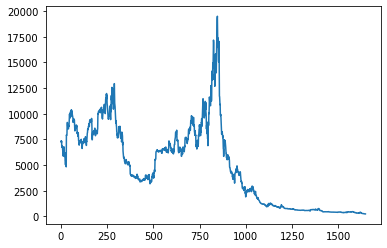

In [26]:
ax1 = btc_day_copy['Close'].plot(style = ['-'])

In [27]:
btc_day_index = btc_day_copy.set_index('Date')

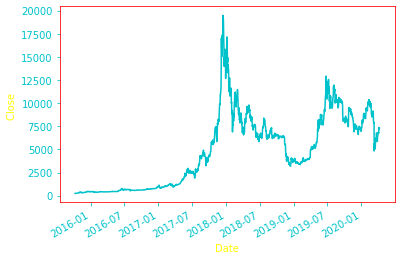

In [28]:
ax2 = btc_day_index['Close'].plot(style = ['-'],color='#00C2CB')
ax2.spines['bottom'].set_color('red')
ax2.spines['top'].set_color('red') 
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('red')
ax2.tick_params(axis='x', colors='#00C2CB')
ax2.tick_params(axis='y', colors='#00C2CB')
#ax2.grid()
ax2.set_ylabel('Close ')
ax2.yaxis.label.set_color('yellow')
ax2.xaxis.label.set_color('yellow')

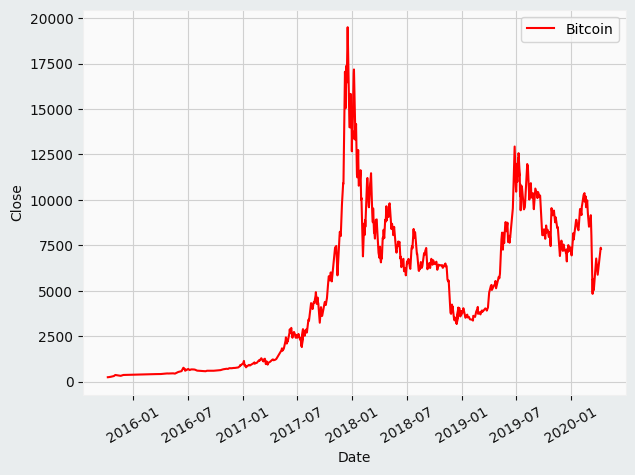

In [53]:
plt.figure (figsize=(7,5),facecolor='#E9EDEE')
plt.plot(btc_day_index['Close'],color='red',label = 'Bitcoin')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend()
plt.xticks(rotation = 30)
#plt.savefig("Close", facecolor='#E9EDEE', bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

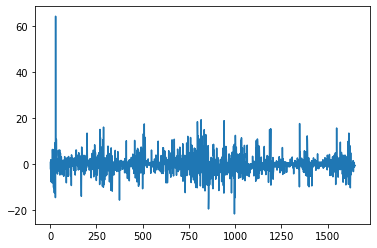

In [30]:
btc_day_copy.set_index('Date')
ax2 = btc_day_copy['Return'].plot(style = ['-'])

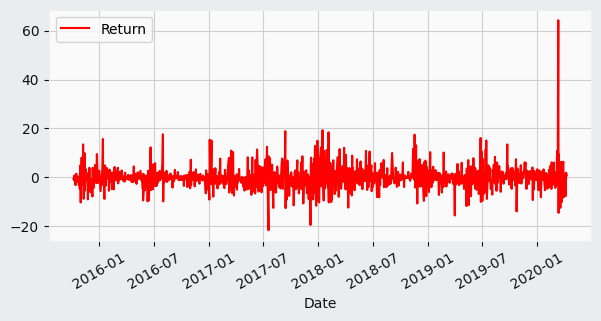

In [64]:
plt.figure (figsize=(7,3),facecolor='#E9EDEE')
plt.plot(btc_day_index['Return'],color='red',label = 'Return')
plt.xlabel('Date')
#plt.ylabel("Return")
plt.legend()
plt.xticks(rotation = 30)
#plt.savefig("output1", facecolor='#E9EDEE', bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

<AxesSubplot:>

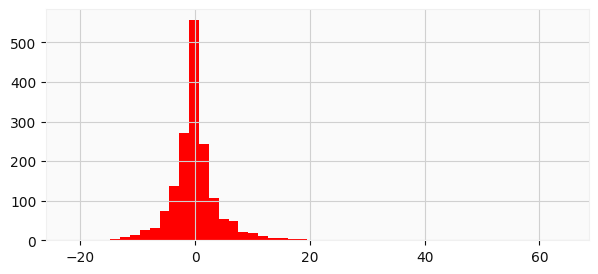

In [78]:
btc_day_index['Return'].hist(bins=50,color='red',figsize=(7,3))

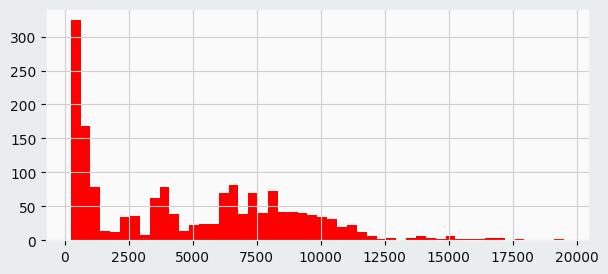

In [70]:
plt.figure(figsize=(7,3),facecolor='#E9EDEE')
plt.hist(btc_day_index['Close'], bins = 50, color = 'red')
#btc_day_index['Close'].plot(kind='kde')
plt.show()

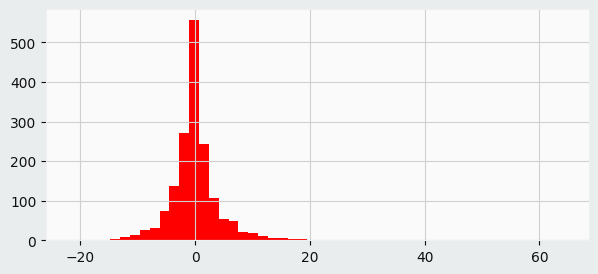

In [77]:
plt.figure(figsize=(7,3),facecolor='#E9EDEE')
plt.hist(btc_day_index['Return'], bins = 50, color = 'red')
#btc_day_index['Close'].plot(kind='kde')
plt.show()

<AxesSubplot:ylabel='Density'>

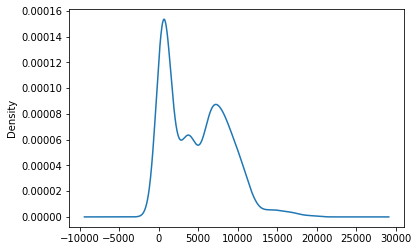

In [34]:
btc_day_index['Close'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

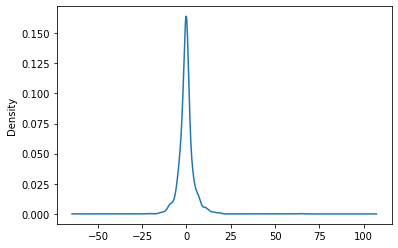

In [35]:
btc_day_index['Return'].plot(kind='kde')

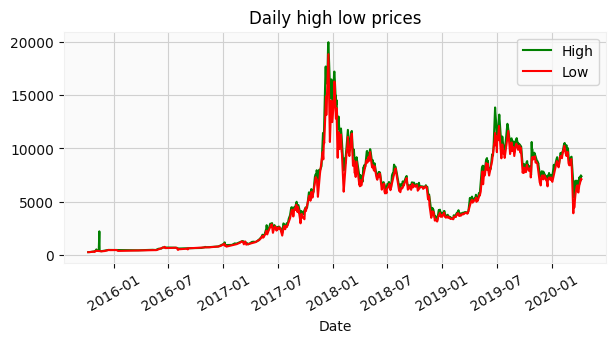

In [54]:
plt.figure (figsize= (7,3))
plt.plot(btc_day_index['High'], color='green', label = 'High')
# Plot the daily low price
plt.plot(btc_day_index['Low'], color='red', label = 'Low')
plt.title('Daily high low prices')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [37]:
btc_day_index

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return
Date,,,,,,,,
2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,NaN
2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,0.742968
2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-2.276786
2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,1.876612
2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80,-7.656441
...,...,...,...,...,...,...,...,...
2015-10-12,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89,-0.960000
2015-10-11,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12,0.767367
2015-10-10,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44,-1.282565


In [38]:
# Resample from daily to weekly

btc_weekly = btc_day_index.resample('W').mean()
btc_weekly.head()

,Open,High,Low,Close,Volume BTC,Volume USD,Return
Date,,,,,,,
2015-10-11,244.535000,247.692500,244.250000,246.285000,18.545000,4563.257500,-0.367872
2015-10-18,256.031429,263.710000,254.200000,258.648571,175.141429,46461.315714,-1.347957
2015-10-25,275.254286,281.348571,273.404286,278.242857,337.531429,93461.344286,-0.810194
2015-11-01,306.202857,323.670000,293.718571,312.005714,939.355714,293904.180000,-3.321859
2015-11-08,378.771429,417.978571,359.361429,385.485714,1708.240000,670326.267143,-0.407066


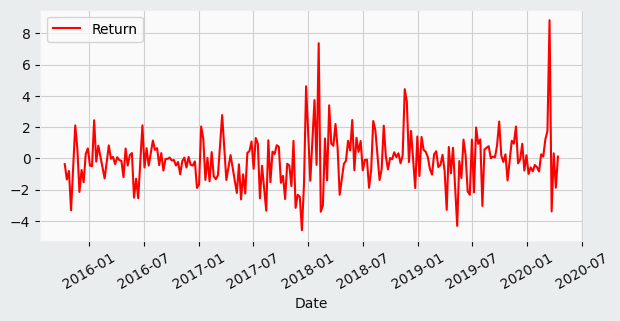

In [66]:
#WEEKLY RETURN

plt.figure (figsize=(7,3),facecolor='#E9EDEE')
plt.plot(btc_weekly['Return'],label = 'Return',color='red')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=30)
plt.show()
#plt.savefig("return_weekly_final", facecolor='#E9EDEE', bbox_inches="tight",pad_inches=0.3, transparent=True)

In [40]:
min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv")
min.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [41]:
min.index = pd.DatetimeIndex(min['Date'])

In [42]:
min.drop(['Unix Timestamp','Symbol','Date'],axis = 1, inplace = True)

In [43]:
v = min['Volume'].values
tp = (min['Low'] + min['Close'] + min['High']).div(3).values
min = min.assign(vwap=(tp * v).cumsum() / v.cumsum())

In [44]:
min

,Open,High,Low,Close,Volume,vwap
Date,,,,,,
2020-04-09 00:00:00,7369.60,7369.60,7348.47,7350.41,7.733528,7356.160000
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954,7357.855376
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774,7358.492288
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251,7358.500226
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867,7358.647317
...,...,...,...,...,...,...
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491,5608.829538
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000,5608.829529
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000,5608.829529


In [45]:
min['2020-04-08']

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\3025851775.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  min['2020-04-08']


,Open,High,Low,Close,Volume,vwap
Date,,,,,,
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954,7357.855376
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774,7358.492288
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251,7358.500226
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867,7358.647317
2020-04-08 23:55:00,7370.61,7370.71,7367.12,7370.71,0.000060,7358.647379
...,...,...,...,...,...,...
2020-04-08 00:04:00,7193.98,7196.90,7190.92,7193.00,0.000086,7303.554401
2020-04-08 00:03:00,7194.22,7202.03,7193.15,7193.98,0.222496,7303.544829
2020-04-08 00:02:00,7209.93,7209.93,7194.22,7194.22,0.046740,7303.542876


C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\55325563.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf = min['2020-04-08']
C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


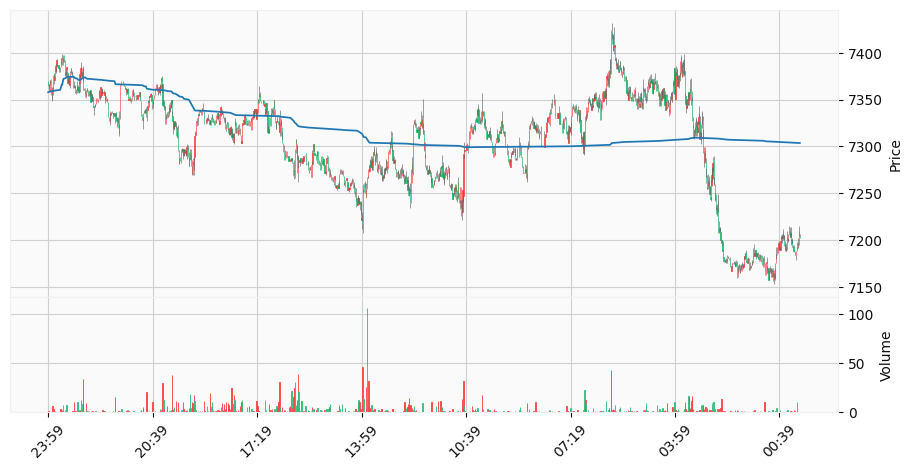

In [46]:
import mplfinance as mpf

tdf = min['2020-04-08']
adp = mpf.make_addplot(tdf['vwap'], type='line')
mpf.plot(tdf, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

C:\Users\Sahil\AppData\Local\Temp\ipykernel_5092\3396030877.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf = hr['2020-04-08']


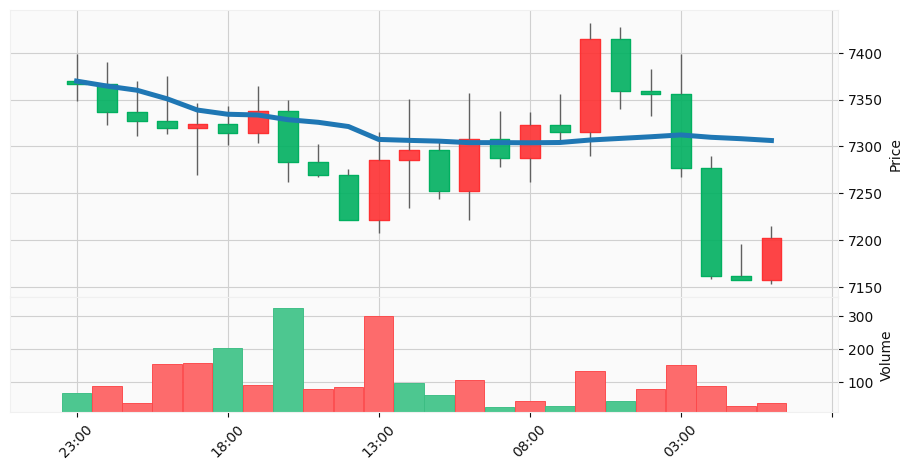

In [47]:
hr = pd.read_csv(r'C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv')
hr.index = pd.DatetimeIndex(hr['Date'])
hr.drop(['Unix Timestamp','Symbol','Date'],axis = 1, inplace = True)
v = hr['Volume'].values
tp = (hr['Low'] + hr['Close'] + hr['High']).div(3).values
hr = hr.assign(vwap=(tp * v).cumsum() / v.cumsum())
tdf = hr['2020-04-08']
adp = mpf.make_addplot(tdf['vwap'], type='line')
mpf.plot(tdf, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

In [79]:
btc_day.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1.647000e+03
mean,4823.493224,4971.083673,4656.335337,4827.596515,3789.357365,2.129125e+07
std,3937.740533,4078.527350,3760.335160,3936.503969,4436.695998,3.694968e+07
min,242.500000,245.000000,236.000000,243.950000,0.000000,0.000000e+00
25%,741.975000,751.830000,732.030000,742.260000,1028.940000,1.659287e+06
50%,4147.100000,4295.090000,4000.000000,4154.840000,2263.370000,9.395394e+06
75%,7920.510000,8139.750000,7630.445000,7920.510000,4918.785000,2.464551e+07
max,19499.990000,19999.000000,18870.000000,19499.990000,49229.150000,5.606539e+08


In [81]:
btc_min.drop('Unix Timestamp',axis = 1, inplace = True)
btc_min.describe()

,Open,High,Low,Close,Volume
count,2.283519e+06,2.283519e+06,2.283519e+06,2.283519e+06,2.283519e+06
mean,4.736700e+03,4.738834e+03,4.734627e+03,4.736704e+03,2.633344e+00
std,3.933689e+03,3.936325e+03,3.931061e+03,3.933689e+03,2.121513e+01
min,0.000000e+00,2.425000e+02,0.000000e+00,2.360000e+02,0.000000e+00
25%,7.176300e+02,7.176500e+02,7.176300e+02,7.176300e+02,0.000000e+00
50%,4.012380e+03,4.013270e+03,4.011690e+03,4.012390e+03,2.014884e-02
75%,7.838370e+03,7.843510e+03,7.834005e+03,7.838390e+03,1.000000e+00
max,1.999900e+04,1.999900e+04,1.999070e+04,1.999900e+04,8.264463e+03


In [82]:
btc_hr.drop('Unix Timestamp',axis = 1, inplace = True)
btc_hr.describe()

,Open,High,Low,Close,Volume
count,39465.000000,39465.000000,39465.000000,39465.000000,39465.000000
mean,4817.778638,4844.889457,4788.678433,4817.963371,158.393961
std,3925.257801,3954.058698,3893.325248,3925.202322,300.774291
min,0.000000,243.600000,0.000000,243.600000,0.000000
25%,741.740000,743.000000,740.020000,741.800000,18.164575
50%,4142.120000,4165.380000,4118.390000,4142.590000,62.790643
75%,7908.480000,7950.000000,7860.750000,7908.480000,175.504078
max,19869.860000,19999.000000,19778.120000,19869.860000,8526.751048
